In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the training dataset
data_train = pd.read_csv(r'D:\Data Science\Internship - Flip Robo\Project-Housing_splitted\train.csv')
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
#importing the test dataset
data_test = pd.read_csv(r'D:\Data Science\Internship - Flip Robo\Project-Housing_splitted\test.csv')
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [4]:
#checking the null values
for i in data_train:
    print(i,'--------',data_train[i].isna().sum(),'--------',(data_train[i].isna().sum()/data_train.shape[0]),'--------',
          data_train[i].dtype)

Id -------- 0 -------- 0.0 -------- int64
MSSubClass -------- 0 -------- 0.0 -------- int64
MSZoning -------- 0 -------- 0.0 -------- object
LotFrontage -------- 214 -------- 0.1832191780821918 -------- float64
LotArea -------- 0 -------- 0.0 -------- int64
Street -------- 0 -------- 0.0 -------- object
Alley -------- 1091 -------- 0.9340753424657534 -------- object
LotShape -------- 0 -------- 0.0 -------- object
LandContour -------- 0 -------- 0.0 -------- object
Utilities -------- 0 -------- 0.0 -------- object
LotConfig -------- 0 -------- 0.0 -------- object
LandSlope -------- 0 -------- 0.0 -------- object
Neighborhood -------- 0 -------- 0.0 -------- object
Condition1 -------- 0 -------- 0.0 -------- object
Condition2 -------- 0 -------- 0.0 -------- object
BldgType -------- 0 -------- 0.0 -------- object
HouseStyle -------- 0 -------- 0.0 -------- object
OverallQual -------- 0 -------- 0.0 -------- int64
OverallCond -------- 0 -------- 0.0 -------- int64
YearBuilt -------- 0 --

following observation and action:
 - column - Alley, missing values -- 1091, Missing percent -- 93.41%, Datatypes -- object, action -- drop
 - column - PoolQC, missing values -- 1161, Missing percent -- 99.41%, Datatypes -- object, action -- drop
 - column - Fence, missing values -- 931, Missing percent -- 80%, Datatypes -- object, action -- drop
 - column - MiscFeature, missing values -- 1124, Missing percent -- 96%, Datatypes -- object, action -- drop
 - column - FireplaceQu, missing values -- 551, Missing percent -- 96%, Datatypes -- object, action -- drop

In [5]:
#checking the null values in test data
for i in data_test:
    print(i,'--------',data_test[i].isna().sum(),'--------',(data_test[i].isna().sum()/data_test.shape[0]),'--------',
          data_test[i].dtype)

Id -------- 0 -------- 0.0 -------- int64
MSSubClass -------- 0 -------- 0.0 -------- int64
MSZoning -------- 0 -------- 0.0 -------- object
LotFrontage -------- 45 -------- 0.1541095890410959 -------- float64
LotArea -------- 0 -------- 0.0 -------- int64
Street -------- 0 -------- 0.0 -------- object
Alley -------- 278 -------- 0.952054794520548 -------- object
LotShape -------- 0 -------- 0.0 -------- object
LandContour -------- 0 -------- 0.0 -------- object
Utilities -------- 0 -------- 0.0 -------- object
LotConfig -------- 0 -------- 0.0 -------- object
LandSlope -------- 0 -------- 0.0 -------- object
Neighborhood -------- 0 -------- 0.0 -------- object
Condition1 -------- 0 -------- 0.0 -------- object
Condition2 -------- 0 -------- 0.0 -------- object
BldgType -------- 0 -------- 0.0 -------- object
HouseStyle -------- 0 -------- 0.0 -------- object
OverallQual -------- 0 -------- 0.0 -------- int64
OverallCond -------- 0 -------- 0.0 -------- int64
YearBuilt -------- 0 -----

In [6]:
data_train = data_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'])
data_test = data_test.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'])

In [7]:
for i in data_train:
    if data_train[i].isna().sum()>1:
        print(i,'=',data_train[i].isna().sum(),'=',data_train[i].dtype)

LotFrontage = 214 = float64
MasVnrType = 7 = object
MasVnrArea = 7 = float64
BsmtQual = 30 = object
BsmtCond = 30 = object
BsmtExposure = 31 = object
BsmtFinType1 = 30 = object
BsmtFinType2 = 31 = object
GarageType = 64 = object
GarageYrBlt = 64 = float64
GarageFinish = 64 = object
GarageQual = 64 = object
GarageCond = 64 = object


In [8]:
# filling all the categorical null data with mode and contineous column with mean
for i in data_train:
    if data_train[i].isna().sum()>1:
        if data_train[i].dtype == 'object':
            data_train[i].fillna(data_train[i].mode()[0],inplace=True)
        else:
            data_train[i].fillna(round(data_train[i].mean(),1),inplace=True)

In [9]:
# filling all the categorical null data with mode and contineous column with mean
for i in data_test:
    if data_test[i].isna().sum()>1:
        if data_test[i].dtype == 'object':
            data_test[i].fillna(data_test[i].mode()[0],inplace=True)
        else:
            data_test[i].fillna(round(data_test[i].mean(),1),inplace=True)

In [10]:
#checking the null values
for i in data_train:
    print(i,'--------',data_train[i].isna().sum())

Id -------- 0
MSSubClass -------- 0
MSZoning -------- 0
LotFrontage -------- 0
LotArea -------- 0
Street -------- 0
LotShape -------- 0
LandContour -------- 0
Utilities -------- 0
LotConfig -------- 0
LandSlope -------- 0
Neighborhood -------- 0
Condition1 -------- 0
Condition2 -------- 0
BldgType -------- 0
HouseStyle -------- 0
OverallQual -------- 0
OverallCond -------- 0
YearBuilt -------- 0
YearRemodAdd -------- 0
RoofStyle -------- 0
RoofMatl -------- 0
Exterior1st -------- 0
Exterior2nd -------- 0
MasVnrType -------- 0
MasVnrArea -------- 0
ExterQual -------- 0
ExterCond -------- 0
Foundation -------- 0
BsmtQual -------- 0
BsmtCond -------- 0
BsmtExposure -------- 0
BsmtFinType1 -------- 0
BsmtFinSF1 -------- 0
BsmtFinType2 -------- 0
BsmtFinSF2 -------- 0
BsmtUnfSF -------- 0
TotalBsmtSF -------- 0
Heating -------- 0
HeatingQC -------- 0
CentralAir -------- 0
Electrical -------- 0
1stFlrSF -------- 0
2ndFlrSF -------- 0
LowQualFinSF -------- 0
GrLivArea -------- 0
BsmtFullBath 

In [11]:
#checking the null values
for i in data_test:
    print(i,'--------',data_test[i].isna().sum())

Id -------- 0
MSSubClass -------- 0
MSZoning -------- 0
LotFrontage -------- 0
LotArea -------- 0
Street -------- 0
LotShape -------- 0
LandContour -------- 0
Utilities -------- 0
LotConfig -------- 0
LandSlope -------- 0
Neighborhood -------- 0
Condition1 -------- 0
Condition2 -------- 0
BldgType -------- 0
HouseStyle -------- 0
OverallQual -------- 0
OverallCond -------- 0
YearBuilt -------- 0
YearRemodAdd -------- 0
RoofStyle -------- 0
RoofMatl -------- 0
Exterior1st -------- 0
Exterior2nd -------- 0
MasVnrType -------- 1
MasVnrArea -------- 1
ExterQual -------- 0
ExterCond -------- 0
Foundation -------- 0
BsmtQual -------- 0
BsmtCond -------- 0
BsmtExposure -------- 0
BsmtFinType1 -------- 0
BsmtFinSF1 -------- 0
BsmtFinType2 -------- 0
BsmtFinSF2 -------- 0
BsmtUnfSF -------- 0
TotalBsmtSF -------- 0
Heating -------- 0
HeatingQC -------- 0
CentralAir -------- 0
Electrical -------- 1
1stFlrSF -------- 0
2ndFlrSF -------- 0
LowQualFinSF -------- 0
GrLivArea -------- 0
BsmtFullBath 

all the missing values has been treated successfully

In [12]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,71.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,71.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,71.0,9819,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [13]:
# making list of contineous and categorical column
cat_col = []
cont_col = []

for i in data_train:
    if data_train[i].dtype == 'object':
       cat_col.append(i)
    else:
        cont_col.append(i)

In [14]:
for i in data_train[cat_col]:
    print(i,'=',len(data_train[i].value_counts()))

MSZoning = 5
Street = 2
LotShape = 4
LandContour = 4
Utilities = 1
LotConfig = 5
LandSlope = 3
Neighborhood = 25
Condition1 = 9
Condition2 = 8
BldgType = 5
HouseStyle = 8
RoofStyle = 6
RoofMatl = 8
Exterior1st = 14
Exterior2nd = 15
MasVnrType = 4
ExterQual = 4
ExterCond = 5
Foundation = 6
BsmtQual = 4
BsmtCond = 4
BsmtExposure = 4
BsmtFinType1 = 6
BsmtFinType2 = 6
Heating = 6
HeatingQC = 5
CentralAir = 2
Electrical = 5
KitchenQual = 4
Functional = 7
GarageType = 6
GarageFinish = 3
GarageQual = 5
GarageCond = 5
PavedDrive = 3
SaleType = 9
SaleCondition = 6


In [15]:
len(cat_col)

38

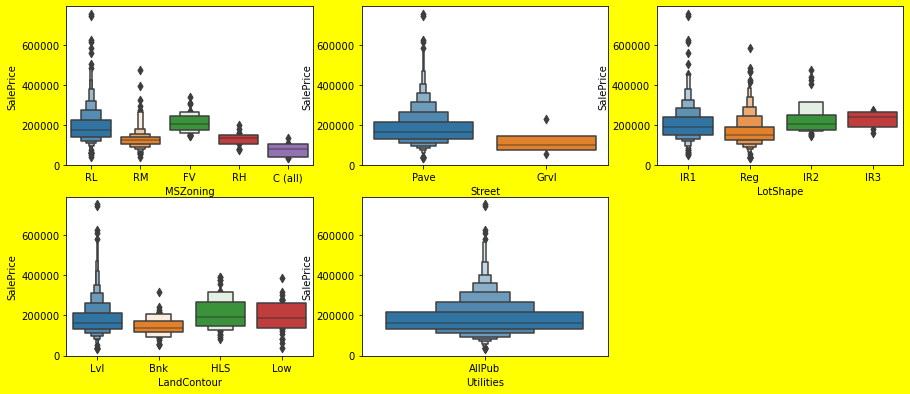

In [16]:
plt.figure(figsize=(15,45),facecolor='Yellow')
fignumber = 1
for i in data_train[cat_col[:5]]:
    if fignumber <= len(data_train[cat_col]):
        ax = plt.subplot((round(len(cat_col)/3,0)),3,fignumber)
        sns.boxenplot(data_train[i],y=data_train['SalePrice'])
    fignumber+=1
plt.show()


in the above image we have compared sales of price of the house with different categorical column:
   - Zoning - we can see that floating house are the most expensive houses  with avergar sale price of 209479 and commercial properties are the cheapest with avergae selling price of 75209 dollars
   - properties on the paved road are more expensive than gravel road
   - sales price of the house are inversly proportionate to its shape, the more irregaluar shape, more expensive houses are
   - Hillside and low depression houses are more expensive as compared to near flat and banked houses
   - there is only single variable on utlities column, so there is no point in keeping this column so we ill delete this column

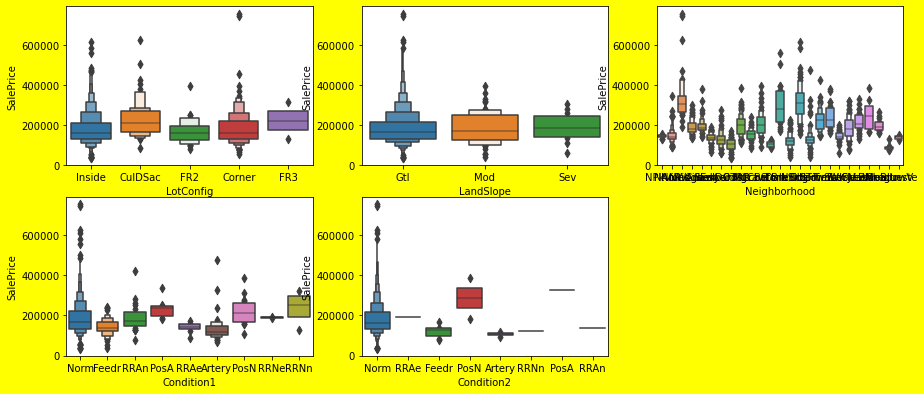

In [17]:
plt.figure(figsize=(15,45),facecolor='Yellow')
fignumber = 1
for i in data_train[cat_col[5:10]]:
    if fignumber <= len(data_train[cat_col]):
        ax = plt.subplot((round(len(cat_col)/3,0)),3,fignumber)
        sns.boxenplot(data_train[i],y=data_train['SalePrice'])
    fignumber+=1
plt.show()

Following are the observation made from above graphs:
 - there is no significant impact of land config and landslope in the sale price of the property
 - properties near railroad and feature park are more expensive as compared to other areas
 - there are lot of variables in Neighbourhood features so we will plot it separately  

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

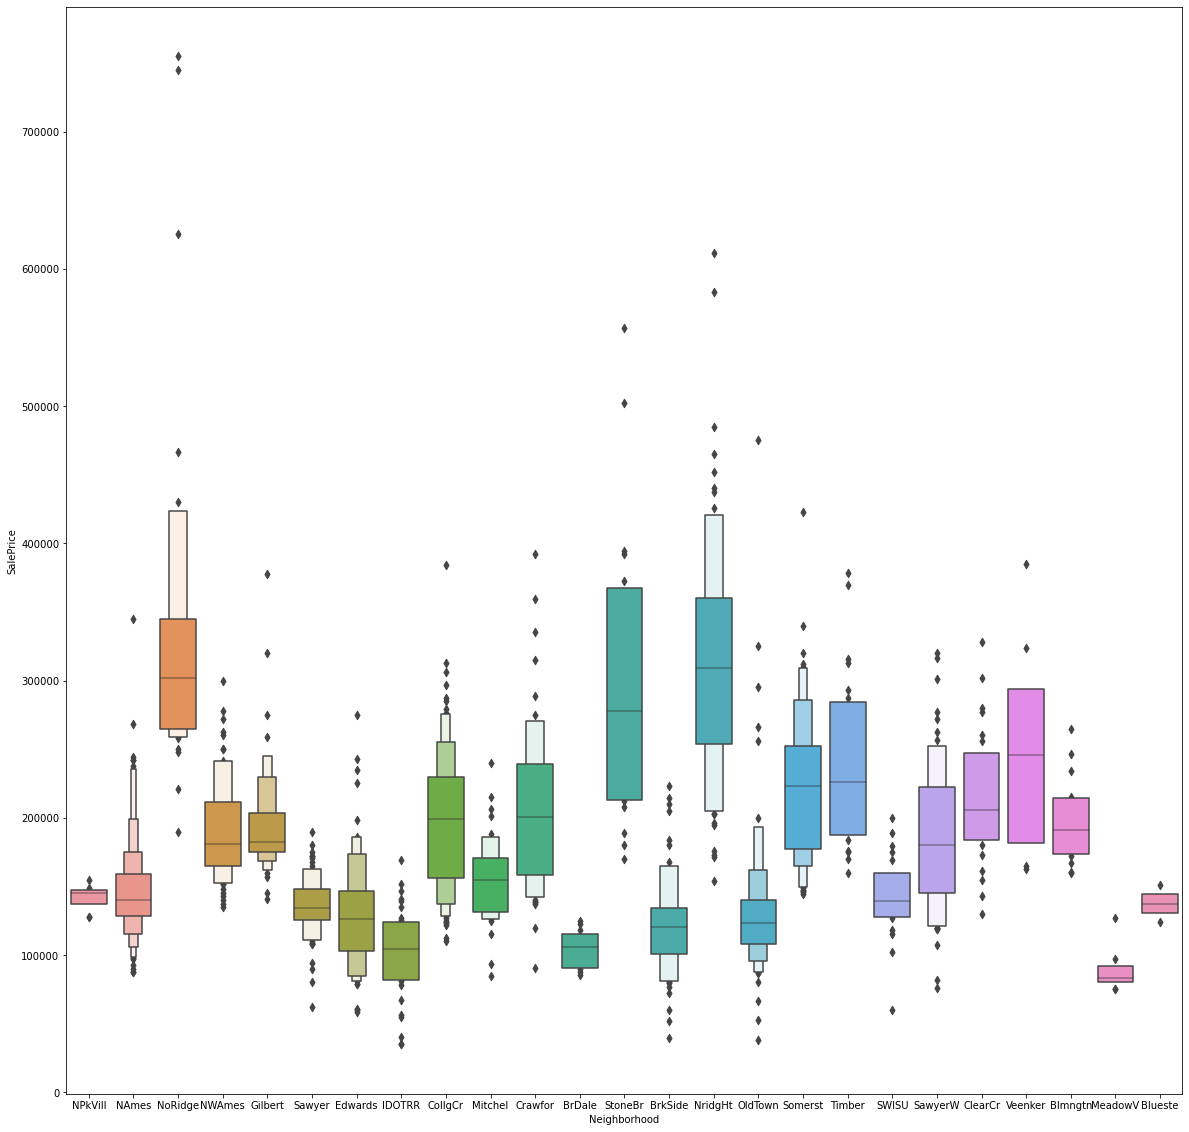

In [18]:
plt.figure(figsize=(20,20))
sns.boxenplot(data_train['Neighborhood'],y=data_train['SalePrice'])

localities like  Northridge Heights, Stone Brook, Northridge have highest selling prices, whereas localities like Meadow Village, Bluestem and Briardale are some of the cheapest locality

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

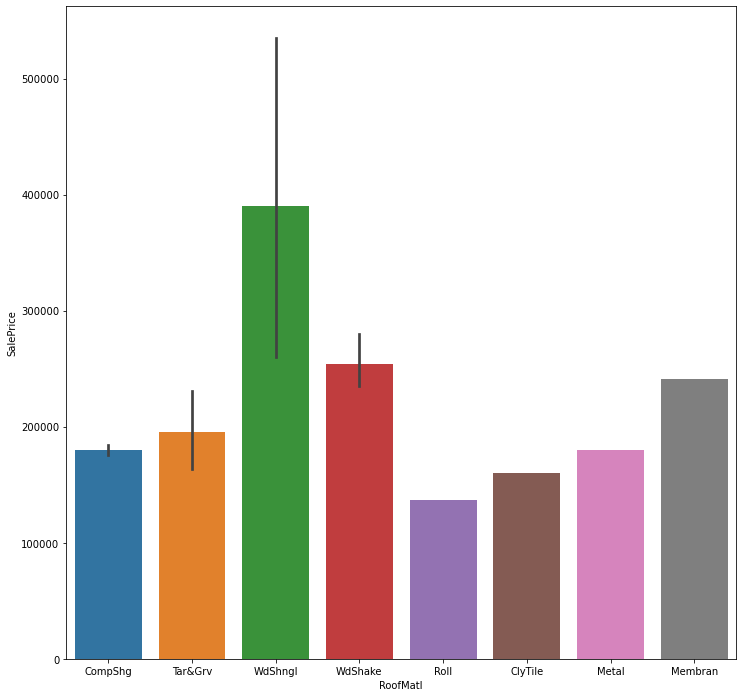

In [19]:
plt.figure(figsize=(12,12))
sns.barplot(y=data_train['SalePrice'],x=data_train['RoofMatl'])

selling price for property is higher when wood is used as the primary material for roof, on the other hand when roll,clay or tiles are used, the selling price are tends to be less

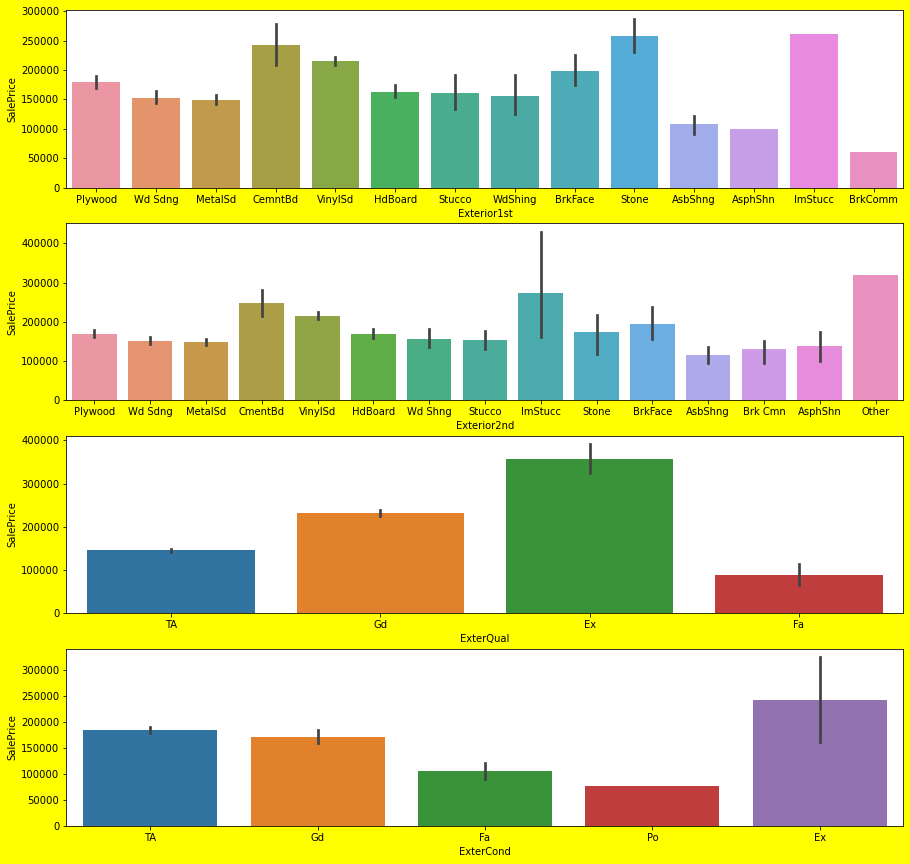

In [20]:
#Comparing exterior with the selling price
plt.figure(figsize=(15,15),facecolor='Yellow')
fignumber = 1
for i in data_train[['Exterior1st','Exterior2nd','ExterQual','ExterCond']]:
    if fignumber <= len(data_train[cat_col]):
        ax = plt.subplot(4,1,fignumber)
        sns.barplot(data_train[i],y=data_train['SalePrice'])
    fignumber+=1
plt.show()

there is no significant effect of Basement type on selling prices, however condition and quality of basement largely influences the selling price

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

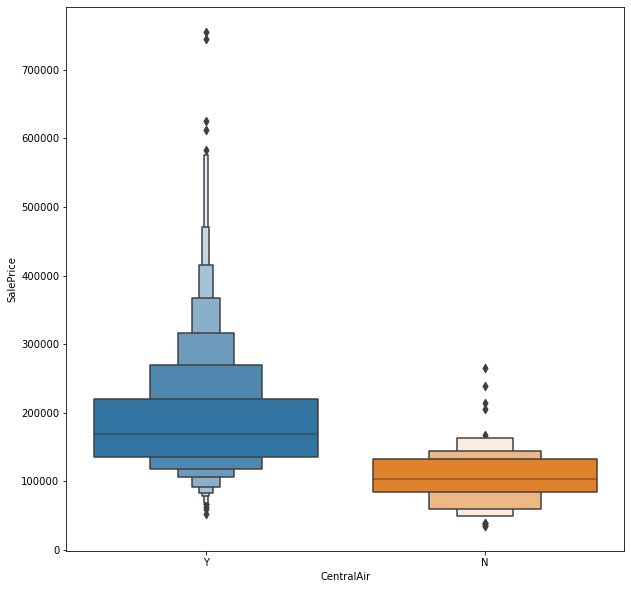

In [23]:
plt.figure(figsize=(10,10))
sns.boxenplot(data_train['CentralAir'],y=data_train['SalePrice'])

As we can see, the unit that has centralized air conditioning are more expensive as compared to one without it

Now We will analyze all the contineous data with the label

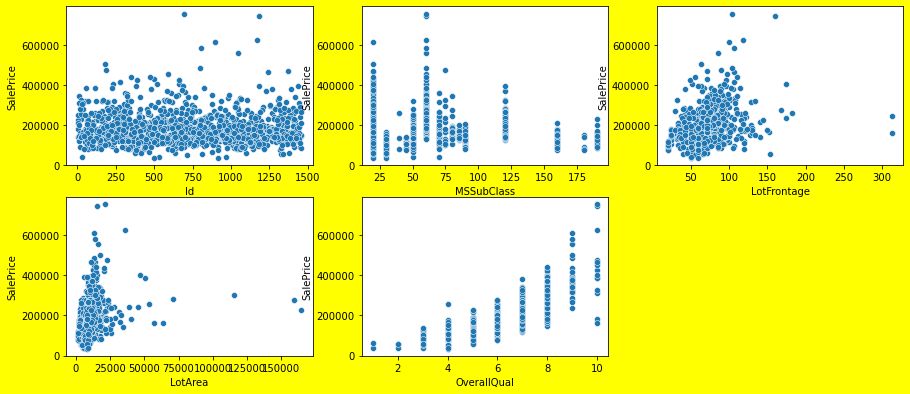

In [24]:
plt.figure(figsize=(15,45),facecolor='Yellow')
fignumber = 1
for i in data_train[cont_col[:5]]:
    if fignumber <= len(data_train[cat_col]):
        ax = plt.subplot((round(len(cat_col)/3,0)),3,fignumber)
        sns.scatterplot(data_train[i],y=data_train['SalePrice'])
    fignumber+=1
plt.show()


AS per the above scatter plot:
 - ID field is irrelavant so we will delete that column for th dataset
 -  Type of dwelling in the property doesnot show any significant influence on the selling price
 - Lot fontage significant impact on the selling price, less lot fontage means cheaper selling price
 - Although lot area and selling price are positively correlated, but we can see just small increase in lot area have significant impact on price
 - As expected, selling price of the property depands on the overall quality of the house, poor quality of the property leads to less market value

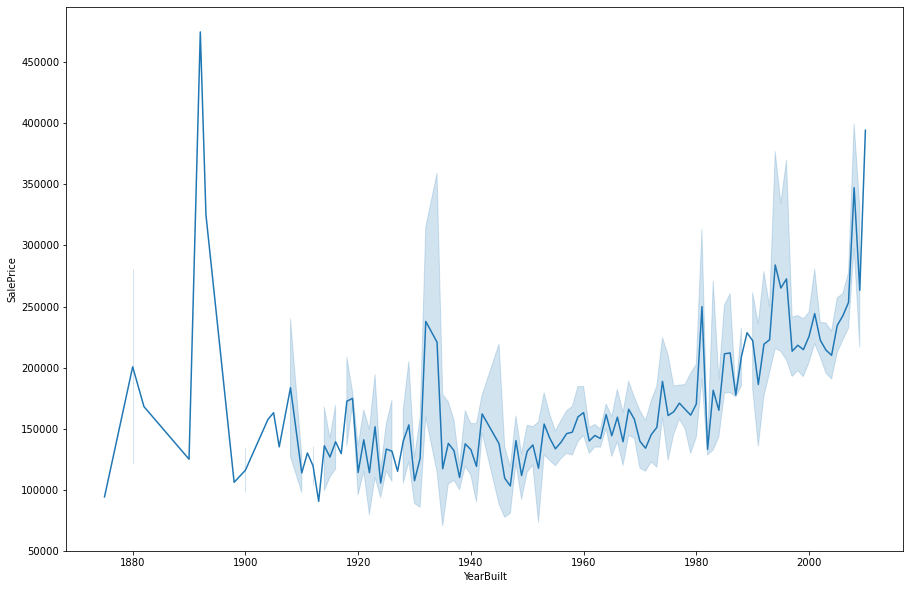

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data_train['YearBuilt'],data_train['SalePrice'])
plt.show()

When we check if the year of built have any impact on he selling price through the line plot we can see the upward trend on the line which means tht new properties are more likely to sell at higher price as compared to the older one

<Figure size 2400x1600 with 0 Axes>

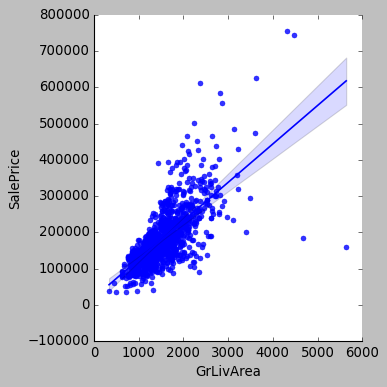

In [104]:
plt.figure(figsize=(30,20))
sns.lmplot(x='GrLivArea',y='SalePrice',data=data_train)
plt.show()

In [27]:
data_train['Id']

0       127
1       889
2       793
3       110
4       422
       ... 
1163    289
1164    554
1165    196
1166     31
1167    617
Name: Id, Length: 1168, dtype: int64

Same upward trend can be seen on Ground living Area, it means that buyer are willing to pay higher price for more ground area

In [28]:
data_train = data_train.drop(columns=['Utilities','Id'])
data_test = data_test.drop(columns=['Utilities','Id'])

In [29]:
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,IR1,HLS,Corner,Gtl,StoneBr,...,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,66.4,5814,Pave,IR1,Lvl,CulDSac,Gtl,StoneBr,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,66.4,11838,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,Reg,Bnk,Inside,Gtl,Crawfor,...,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,IR1,Lvl,CulDSac,Gtl,Somerst,...,18,0,0,0,0,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,Reg,Lvl,Inside,Gtl,Somerst,...,99,0,0,0,0,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,IR2,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,2,2008,WD,Normal
289,20,RL,66.4,11241,Pave,IR1,Lvl,CulDSac,Gtl,NAmes,...,0,0,0,0,0,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,Reg,Lvl,Corner,Gtl,BrkSide,...,24,36,0,0,0,0,10,2006,WD,Normal


In [31]:
cont_col.remove('Id')

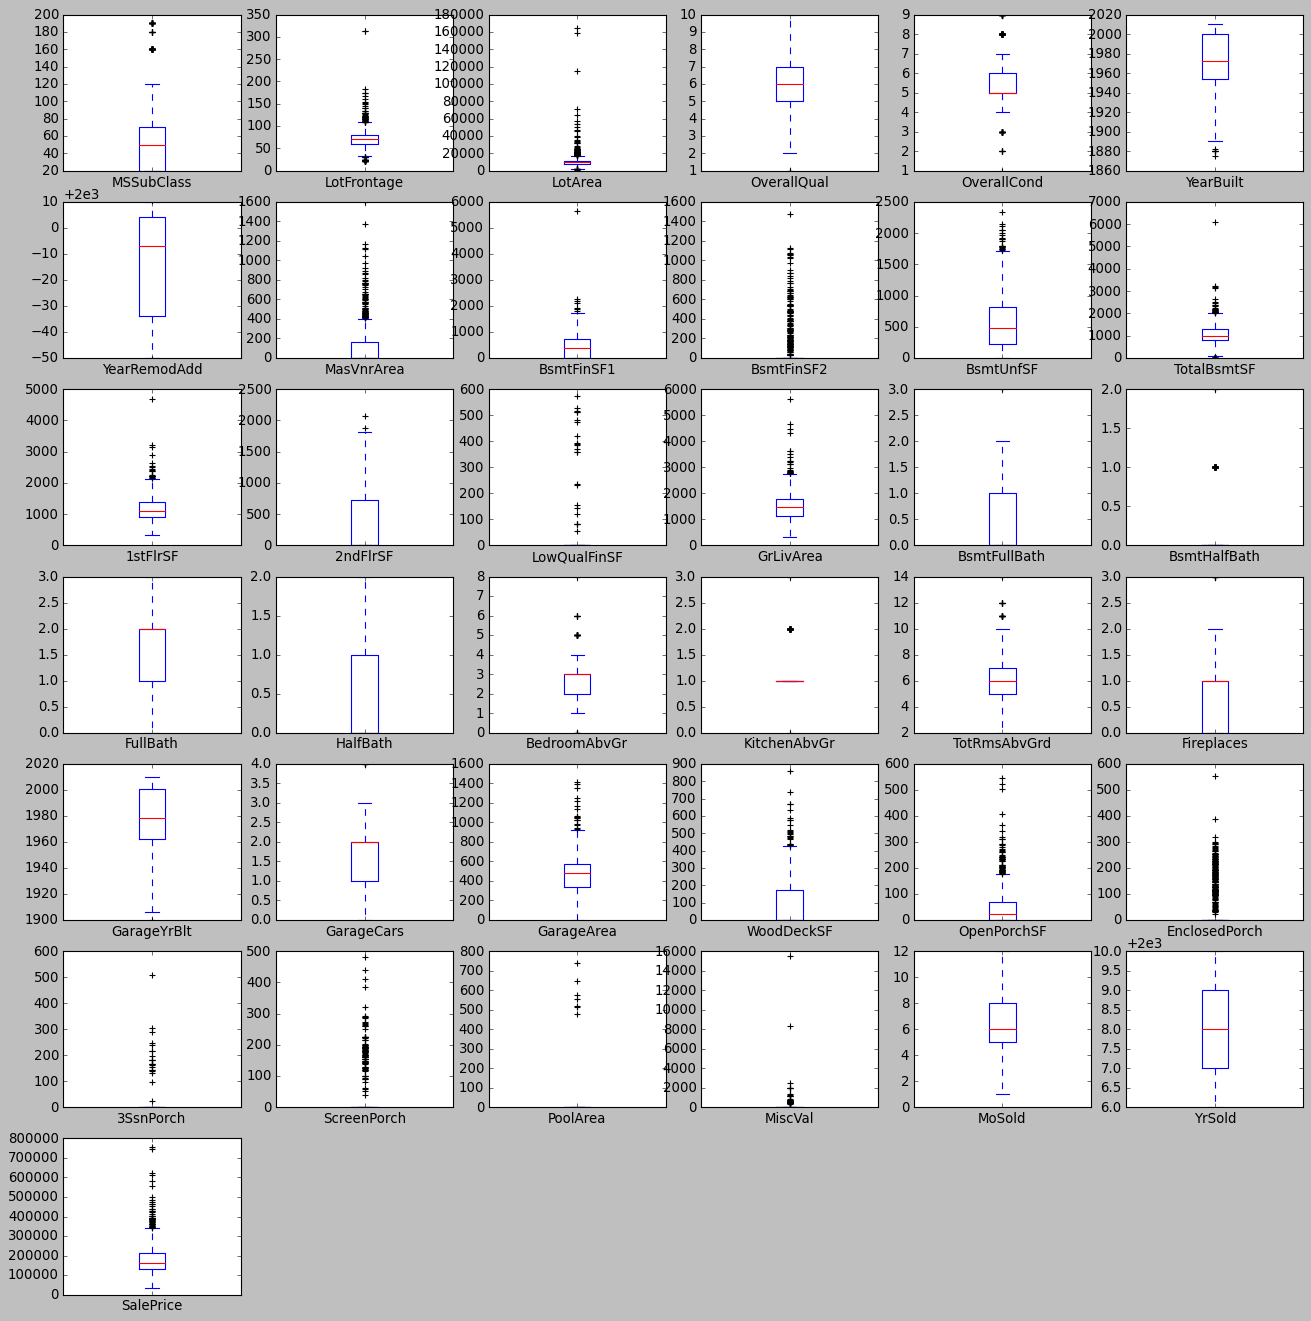

In [32]:
plt.style.use("classic")
data_train[cont_col].plot(kind='box',figsize=(20,20),subplots=True,sharex=False,layout=(7,6))
plt.show()

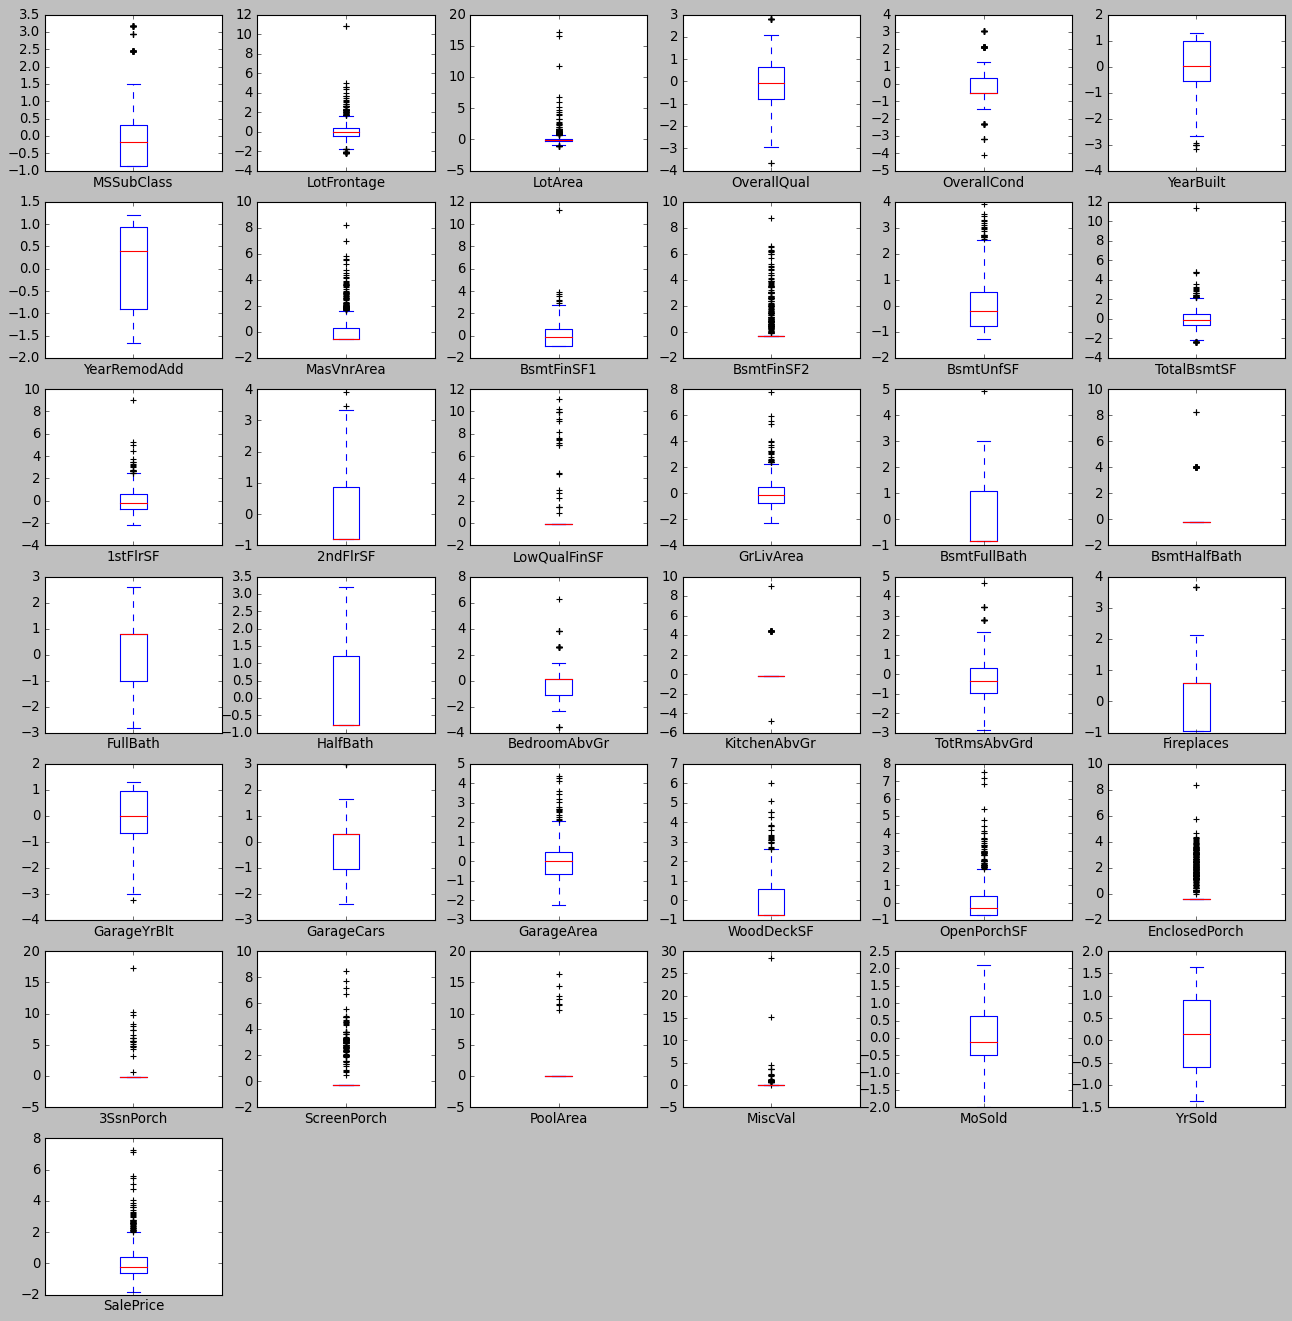

In [33]:
from scipy.stats import zscore

plt.style.use("classic")
zscore(data_train[cont_col]).plot(kind='box',figsize=(20,20),subplots=True,sharex=False,layout=(7,6))
plt.show()


In [34]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,71.0,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,71.0,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,71.0,9819,Pave,IR1,Lvl,Inside,Gtl,Sawyer,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,Edwards,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,NPkVill,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [35]:
for i in cont_col:
    print(i,'---------', len(data_train[i].value_counts()))

MSSubClass --------- 15
LotFrontage --------- 106
LotArea --------- 892
OverallQual --------- 10
OverallCond --------- 9
YearBuilt --------- 110
YearRemodAdd --------- 61
MasVnrArea --------- 284
BsmtFinSF1 --------- 551
BsmtFinSF2 --------- 122
BsmtUnfSF --------- 681
TotalBsmtSF --------- 636
1stFlrSF --------- 669
2ndFlrSF --------- 351
LowQualFinSF --------- 21
GrLivArea --------- 746
BsmtFullBath --------- 4
BsmtHalfBath --------- 3
FullBath --------- 4
HalfBath --------- 3
BedroomAbvGr --------- 8
KitchenAbvGr --------- 4
TotRmsAbvGrd --------- 12
Fireplaces --------- 4
GarageYrBlt --------- 98
GarageCars --------- 5
GarageArea --------- 392
WoodDeckSF --------- 244
OpenPorchSF --------- 176
EnclosedPorch --------- 106
3SsnPorch --------- 18
ScreenPorch --------- 65
PoolArea --------- 8
MiscVal --------- 20
MoSold --------- 12
YrSold --------- 5
SalePrice --------- 581


In [36]:
data_train['GarageCars'].value_counts()

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64

In [37]:
# we have some year columns, i will convert them into years
# changing training set  
data_train["YearBuilt"] = 2022 - data_train["YearBuilt"]
data_train["YearRemodAdd"] = 2022 - data_train["YearRemodAdd"]
data_train["GarageYrBlt"] = 2022 - data_train["GarageYrBlt"]
data_train["YrSold"] = 2022 - data_train["YrSold"]

# Changing the test set
data_test["YearBuilt"] = 2022 - data_test["YearBuilt"]
data_test["YearRemodAdd"] = 2022 - data_test["YearRemodAdd"]
data_test["GarageYrBlt"] = 2022 - data_test["GarageYrBlt"]
data_test["YrSold"] = 2022 - data_test["YrSold"]

In [38]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,71.0,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0,0,0,0,0,2,15,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0,0,224,0,0,10,15,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,...,0,0,0,0,0,6,15,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,1,12,COD,Normal,190000
4,20,RL,71.0,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,...,0,0,0,0,0,6,13,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,71.0,9819,Pave,IR1,Lvl,Inside,Gtl,Sawyer,...,0,0,0,0,0,2,12,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,Edwards,...,0,0,0,0,0,5,13,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,NPkVill,...,0,0,0,0,0,7,13,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,...,172,0,0,0,0,7,14,WD,Normal,40000


In [39]:
pd.set_option('display.max_column',None)
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.990582,10484.749144,6.104452,5.595890,51.069349,37.241438,102.310017,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,43.805822,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,14.195205,181477.005993
std,41.940650,22.437057,8957.442311,1.390153,1.124343,30.145255,20.785185,182.047152,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.198560,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,22.000000,18.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,21.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,13.000000,130375.000000
50%,50.000000,71.000000,9522.500000,6.000000,5.000000,50.000000,29.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,43.800000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,14.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,68.000000,56.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,60.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,15.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,147.000000,72.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,122.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,16.000000,755000.000000


Checking the structure of training dataset, following observation has been made
 - for the following columns  more than 75% of the data is 0
    - MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, LowQualFinSF, BsmtFinSF2, BsmtHalfBath we will drop these column from the dataset

In [40]:
data_train = data_train.drop(columns=['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','LowQualFinSF'
                                     ,'BsmtFinSF2','BsmtHalfBath'])
data_test = data_test.drop(columns=['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','LowQualFinSF'
                                     ,'BsmtFinSF2','BsmtHalfBath'])

In [41]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,71.0,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,46,46,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,958,1078,GasA,TA,Y,SBrkr,958,0,958,0,2,0,2,1,TA,5,Typ,1,Attchd,45.0,RFn,2,440,TA,TA,Y,0,205,2,15,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,52,52,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,1043,2217,GasA,Ex,Y,SBrkr,2217,0,2217,1,2,0,4,1,Gd,8,Typ,1,Attchd,52.0,Unf,2,621,TA,TA,Y,81,207,10,15,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,26,25,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,255,1117,GasA,Ex,Y,SBrkr,1127,886,2013,1,2,1,3,1,TA,8,Typ,1,Attchd,25.0,Unf,2,455,TA,TA,Y,180,130,6,15,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,45,45,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,1139,1844,GasA,Ex,Y,SBrkr,1844,0,1844,0,2,0,3,1,TA,7,Typ,1,Attchd,45.0,RFn,2,546,TA,TA,Y,0,122,1,12,COD,Normal,190000
4,20,RL,71.0,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,45,22,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,356,1602,GasA,Gd,Y,SBrkr,1602,0,1602,0,2,0,3,1,Gd,8,Typ,1,Attchd,45.0,Fin,2,529,TA,TA,Y,240,0,6,13,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,71.0,9819,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,55,55,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,432,882,GasA,TA,Y,SBrkr,900,0,900,0,1,0,3,1,TA,5,Typ,0,Detchd,52.0,Unf,1,280,TA,TA,Y,0,0,2,12,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,73,19,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,0,GasA,Ex,Y,SBrkr,1126,0,1126,0,2,0,2,1,Gd,5,Typ,0,Detchd,20.0,Fin,2,520,TA,TA,N,0,96,5,13,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,46,46,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,289,855,GasA,TA,Y,SBrkr,855,601,1456,0,2,1,3,1,TA,7,Typ,1,Attchd,46.0,Unf,2,440,TA,TA,Y,87,0,7,13,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,102,72,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,649,649,GasA,TA,N,SBrkr,649,668,1317,0,1,0,3,1,TA,6,Typ,0,Detchd,102.0,Unf,1,250,TA,Fa,N,0,54,7,14,WD,Normal,40000


In [42]:
# making list of contineous and categorical column
cat_col = []
cont_col = []

for i in data_train:
    if data_train[i].dtype == 'object':
       cat_col.append(i)
    else:
        cont_col.append(i)

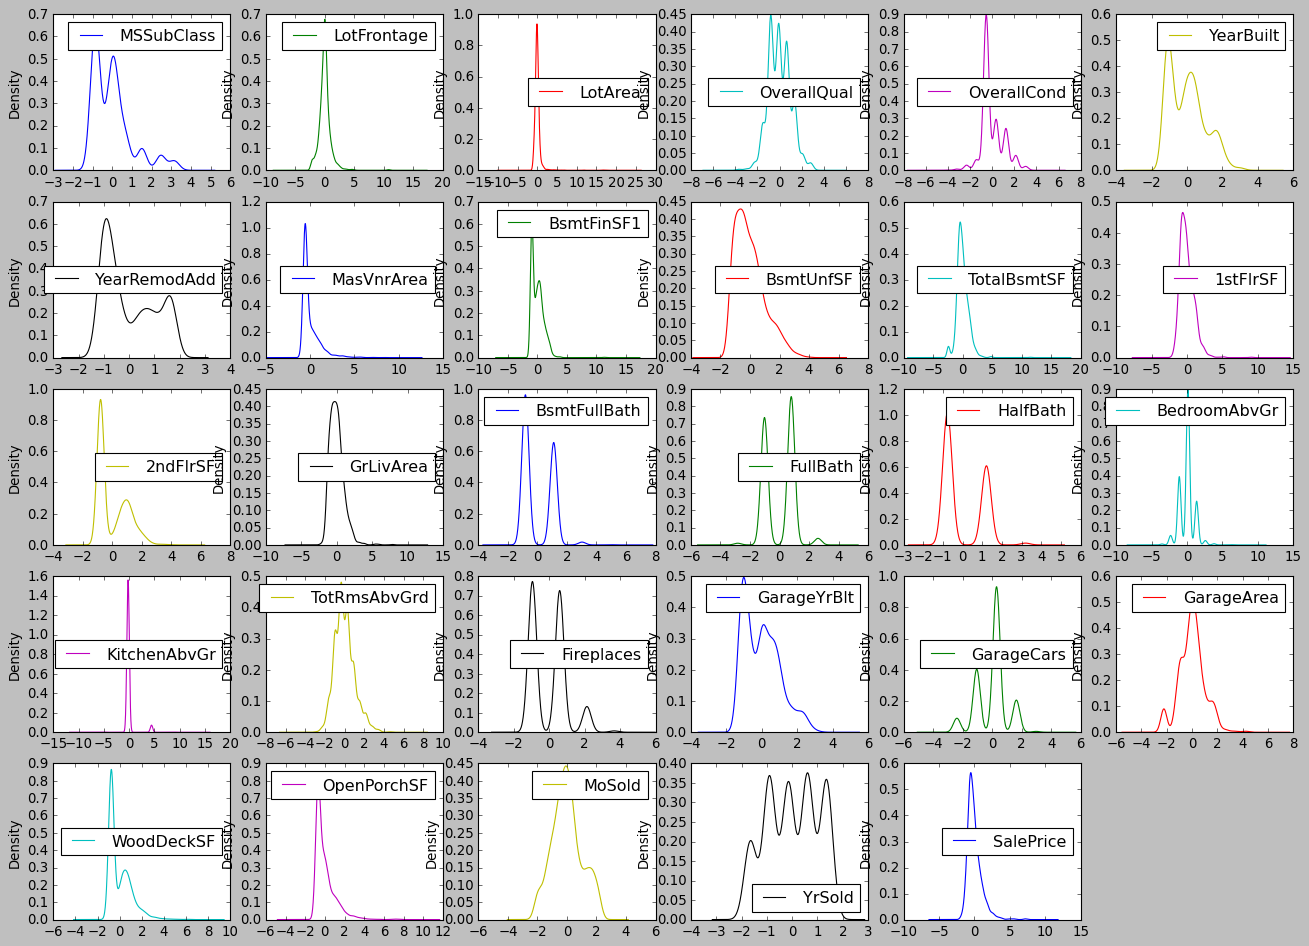

In [43]:
plt.style.use("classic")
zscore(data_train[cont_col]).plot(kind='density',figsize=(20,20),subplots=True,sharex=False,layout=(7,6))
plt.show()

data_train.shape[0]

In [44]:
data_train.skew().sort_values(ascending=False)

LotArea         10.659285
KitchenAbvGr     4.365259
MasVnrArea       2.834659
LotFrontage      2.710100
OpenPorchSF      2.410840
SalePrice        1.953878
BsmtFinSF1       1.871606
TotalBsmtSF      1.744591
1stFlrSF         1.513707
WoodDeckSF       1.504929
GrLivArea        1.449952
MSSubClass       1.422019
BsmtUnfSF        0.909057
2ndFlrSF         0.823479
Fireplaces       0.671966
GarageYrBlt      0.662976
HalfBath         0.656492
TotRmsAbvGrd     0.644657
BsmtFullBath     0.627106
OverallCond      0.580714
YearBuilt        0.579204
YearRemodAdd     0.495864
BedroomAbvGr     0.243855
MoSold           0.220979
GarageArea       0.189665
OverallQual      0.175082
FullBath         0.057809
YrSold          -0.115765
GarageCars      -0.358556
dtype: float64

In [45]:
# outlier remaoval
z_score= np.abs(zscore(data_train[cont_col]))

data_new = data_train[(z_score<3).all(axis=1)]

<AxesSubplot:>

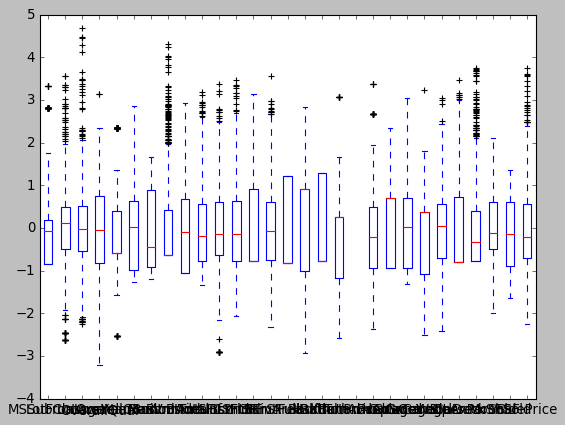

In [46]:
zscore(data_new[cont_col]).plot(kind='box')

In [47]:
data_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,71.0,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,46,46,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,958,1078,GasA,TA,Y,SBrkr,958,0,958,0,2,0,2,1,TA,5,Typ,1,Attchd,45.0,RFn,2,440,TA,TA,Y,0,205,2,15,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,52,52,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,1043,2217,GasA,Ex,Y,SBrkr,2217,0,2217,1,2,0,4,1,Gd,8,Typ,1,Attchd,52.0,Unf,2,621,TA,TA,Y,81,207,10,15,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,26,25,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,255,1117,GasA,Ex,Y,SBrkr,1127,886,2013,1,2,1,3,1,TA,8,Typ,1,Attchd,25.0,Unf,2,455,TA,TA,Y,180,130,6,15,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,45,45,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,1139,1844,GasA,Ex,Y,SBrkr,1844,0,1844,0,2,0,3,1,TA,7,Typ,1,Attchd,45.0,RFn,2,546,TA,TA,Y,0,122,1,12,COD,Normal,190000
4,20,RL,71.0,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,45,22,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,356,1602,GasA,Gd,Y,SBrkr,1602,0,1602,0,2,0,3,1,Gd,8,Typ,1,Attchd,45.0,Fin,2,529,TA,TA,Y,240,0,6,13,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,71.0,9819,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,55,55,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,432,882,GasA,TA,Y,SBrkr,900,0,900,0,1,0,3,1,TA,5,Typ,0,Detchd,52.0,Unf,1,280,TA,TA,Y,0,0,2,12,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,73,19,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,0,GasA,Ex,Y,SBrkr,1126,0,1126,0,2,0,2,1,Gd,5,Typ,0,Detchd,20.0,Fin,2,520,TA,TA,N,0,96,5,13,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,46,46,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,289,855,GasA,TA,Y,SBrkr,855,601,1456,0,2,1,3,1,TA,7,Typ,1,Attchd,46.0,Unf,2,440,TA,TA,Y,87,0,7,13,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,102,72,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,649,649,GasA,TA,N,SBrkr,649,668,1317,0,1,0,3,1,TA,6,Typ,0,Detchd,102.0,Unf,1,250,TA,Fa,N,0,54,7,14,WD,Normal,40000


In [48]:
from sklearn.preprocessing import LabelEncoder

for i in cat_col:
    data_new[i] = LabelEncoder().fit_transform(data_new[i])

In [49]:
for i in cat_col:
    data_test[i] = LabelEncoder().fit_transform(data_test[i])

In [50]:
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,17,16,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,673,1922,0,0,1,3,1922,0,1922,1,2,0,3,1,2,8,5,1,1,17.0,0,3,676,4,4,2,178,51,7,15,5,2
1,120,2,66.4,5814,1,0,3,1,0,21,2,0,4,2,8,5,38,38,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,184,1220,0,2,1,3,1360,0,1360,1,1,0,1,1,2,4,5,1,1,38.0,1,2,565,4,4,2,63,0,8,13,0,0
2,20,2,66.4,11838,1,3,3,4,0,4,2,0,0,2,8,5,21,21,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,1753,1753,0,0,1,3,1788,0,1788,0,2,0,3,1,0,7,5,1,1,21.0,1,2,522,4,4,2,202,151,6,13,5,2
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,81,72,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,429,704,0,0,1,3,860,704,1564,0,1,1,3,1,1,7,5,1,1,81.0,2,1,234,4,4,2,0,0,7,13,5,2
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,15,15,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,894,894,0,0,1,3,894,1039,1933,0,2,1,4,1,2,9,5,1,3,15.0,0,3,668,4,4,2,100,18,1,14,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,78.0,10206,1,3,3,4,0,20,2,0,0,2,8,5,15,15,1,0,9,11,3,468.0,3,3,2,2,2,3,2,33,5,1530,1563,0,0,1,3,1563,0,1563,0,2,0,3,1,2,6,5,1,1,15.0,1,3,758,4,4,2,144,99,10,14,5,2
288,20,2,57.0,9245,1,1,3,4,0,4,2,0,0,2,5,5,28,27,1,0,9,11,2,0.0,3,3,2,2,2,3,2,686,5,304,990,0,0,1,3,990,0,990,0,1,0,3,1,3,5,5,0,5,26.0,2,2,672,4,4,2,0,0,2,14,5,2
289,20,2,66.4,11241,1,0,3,1,0,11,2,0,0,2,6,7,52,52,1,0,10,12,1,180.0,3,3,1,3,2,3,0,578,5,426,1004,0,0,1,3,1004,0,1004,1,1,0,2,1,3,5,5,1,1,52.0,0,2,480,4,4,2,0,0,3,12,5,2
290,50,3,50.0,5000,1,3,3,0,0,2,1,0,0,0,6,7,75,72,1,0,4,4,2,0.0,3,2,1,3,2,3,0,399,5,605,1004,0,0,1,3,1004,660,1664,0,2,0,3,1,3,7,5,2,5,72.0,2,2,420,4,4,2,0,24,10,16,5,2


In [51]:
X = data_new.drop(columns='SalePrice')
y = data_new['SalePrice']

In [52]:
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,2,86.0,14157,1,0,1,0,0,21,2,0,0,2,9,5,17,16,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,673,1922,0,0,1,3,1922,0,1922,1,2,0,3,1,2,8,5,1,1,17.0,0,3,676,4,4,2,178,51,7,15,5,2
1,120,2,66.4,5814,1,0,3,1,0,21,2,0,4,2,8,5,38,38,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,184,1220,0,2,1,3,1360,0,1360,1,1,0,1,1,2,4,5,1,1,38.0,1,2,565,4,4,2,63,0,8,13,0,0
2,20,2,66.4,11838,1,3,3,4,0,4,2,0,0,2,8,5,21,21,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,1753,1753,0,0,1,3,1788,0,1788,0,2,0,3,1,0,7,5,1,1,21.0,1,2,522,4,4,2,202,151,6,13,5,2
3,70,2,75.0,12000,1,3,0,4,0,5,2,0,0,5,7,7,81,72,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,429,704,0,0,1,3,860,704,1564,0,1,1,3,1,1,7,5,1,1,81.0,2,1,234,4,4,2,0,0,7,13,5,2
4,60,2,86.0,14598,1,0,3,1,0,20,1,0,0,5,6,5,15,15,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,894,894,0,0,1,3,894,1039,1933,0,2,1,4,1,2,9,5,1,3,15.0,0,3,668,4,4,2,100,18,1,14,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,2,78.0,10206,1,3,3,4,0,20,2,0,0,2,8,5,15,15,1,0,9,11,3,468.0,3,3,2,2,2,3,2,33,5,1530,1563,0,0,1,3,1563,0,1563,0,2,0,3,1,2,6,5,1,1,15.0,1,3,758,4,4,2,144,99,10,14,5,2
288,20,2,57.0,9245,1,1,3,4,0,4,2,0,0,2,5,5,28,27,1,0,9,11,2,0.0,3,3,2,2,2,3,2,686,5,304,990,0,0,1,3,990,0,990,0,1,0,3,1,3,5,5,0,5,26.0,2,2,672,4,4,2,0,0,2,14,5,2
289,20,2,66.4,11241,1,0,3,1,0,11,2,0,0,2,6,7,52,52,1,0,10,12,1,180.0,3,3,1,3,2,3,0,578,5,426,1004,0,0,1,3,1004,0,1004,1,1,0,2,1,3,5,5,1,1,52.0,0,2,480,4,4,2,0,0,3,12,5,2
290,50,3,50.0,5000,1,3,3,0,0,2,1,0,0,0,6,7,75,72,1,0,4,4,2,0.0,3,2,1,3,2,3,0,399,5,605,1004,0,0,1,3,1004,660,1664,0,2,0,3,1,3,7,5,2,5,72.0,2,2,420,4,4,2,0,24,10,16,5,2


In [55]:
cont_col.remove('')

In [56]:
X[cont_col].skew().sort_values(ascending=False)

MasVnrArea      1.692709
OpenPorchSF     1.460667
MSSubClass      1.386896
WoodDeckSF      1.000645
2ndFlrSF        0.779278
BsmtUnfSF       0.776521
LotArea         0.662138
1stFlrSF        0.651281
GarageYrBlt     0.621018
BsmtFinSF1      0.605532
OverallCond     0.588485
GrLivArea       0.557097
Fireplaces      0.545050
HalfBath        0.527409
YearRemodAdd    0.502473
YearBuilt       0.478530
TotRmsAbvGrd    0.421341
BsmtFullBath    0.394043
MoSold          0.268951
TotalBsmtSF     0.177060
FullBath        0.093101
LotFrontage     0.081104
OverallQual     0.068019
KitchenAbvGr    0.000000
GarageArea     -0.019939
BedroomAbvGr   -0.114617
YrSold         -0.123067
GarageCars     -0.332327
dtype: float64

In [64]:
X.drop(columns='KitchenAbvGr',inplace=True)

In [66]:
cont_col.remove('KitchenAbvGr')

<AxesSubplot:>

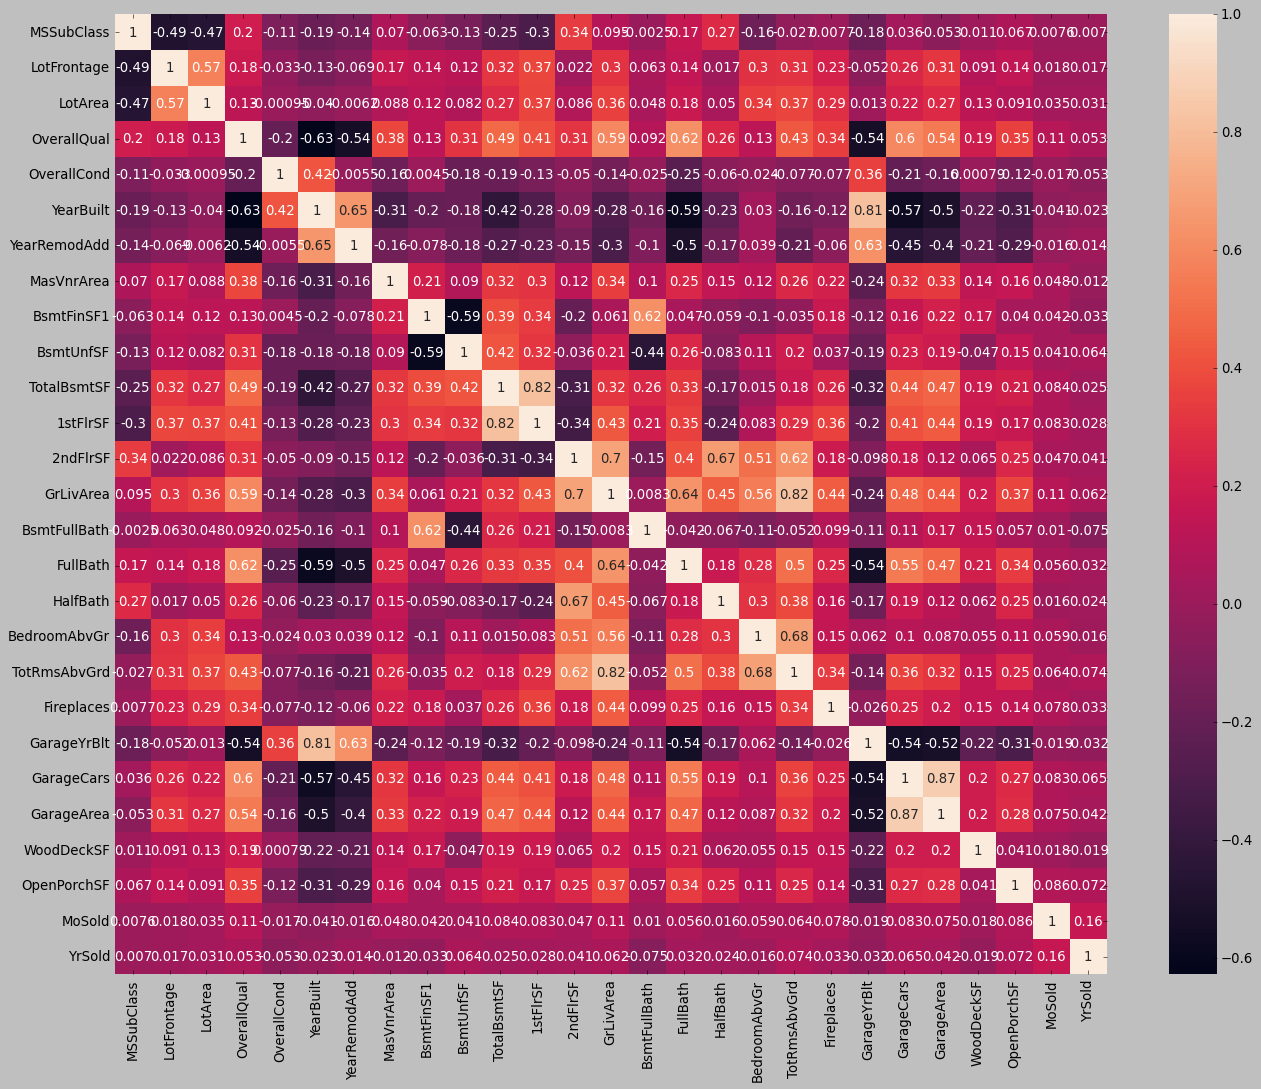

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(X[cont_col].corr(),annot=True)

In [91]:
data_test.drop(columns='KitchenAbvGr',inplace=True)

In [68]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[ 1.75985401, -0.02469588,  0.10959596, ...,  0.60257998,
         0.31659629,  0.19185821],
       [-0.85649004, -0.02469588,  1.42813176, ...,  0.60257998,
         0.31659629,  0.19185821],
       [ 0.19004758, -0.02469588,  1.26331479, ...,  0.60257998,
         0.31659629,  0.19185821],
       ...,
       [ 2.80639164, -0.02469588, -2.47253666, ..., -0.89655898,
         0.31659629,  0.19185821],
       [ 0.45168198, -4.83545402, -1.04412287, ..., -0.1469895 ,
         0.31659629,  0.19185821],
       [ 0.19004758, -0.02469588,  0.10959596, ...,  1.35214947,
         0.31659629,  0.19185821]])

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y, test_size =0.2, random_state =60)

In [70]:
print("training data X ",X_train.shape)
print("training data Y",y_train.shape)
print("training_test data X",X_test.shape)
print("training_test data Y",y_test.shape)

training data X  (779, 64)
training data Y (779,)
training_test data X (195, 64)
training_test data Y (195,)


In [71]:
from sklearn.model_selection import  GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [102]:
#checking the fit score, r2 score, mean absolute error using different models
model = [DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),LinearRegression()]

for i in model:
    i.fit(X_train,y_train)
    print(i)
    print('fit score :', i.score(X_train,y_train))
    pred= i.predict(X_test)
    print('r2 score', r2_score(y_test,pred))
    print('mean absolute error', mean_absolute_error(y_test,pred))
    print('root mean squered error', math.sqrt(mean_squared_error(y_test,pred)))
    print("\n")

DecisionTreeRegressor()
fit score : 1.0
r2 score 0.7454408788321328
mean absolute error 22350.548717948717
root mean squered error 30484.08687950031


RandomForestRegressor()
fit score : 0.9824459942002917
r2 score 0.8545263921302702
mean absolute error 15435.306923076925
root mean squered error 23044.694978195


GradientBoostingRegressor()
fit score : 0.9744003294259012
r2 score 0.8670638494305472
mean absolute error 14048.034068358025
root mean squered error 22029.28535614636


AdaBoostRegressor()
fit score : 0.8961956388107729
r2 score 0.8175049785306732
mean absolute error 17291.956799671618
root mean squered error 25810.97260299813


LinearRegression()
fit score : 0.9151043841976304
r2 score 0.8552466990158691
mean absolute error 16404.881075283203
root mean squered error 22987.5717261543




In [74]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
param = {'loss':['ls', 'lad', 'huber', 'quantile'],'learning_rate': [.1,.2,.3,.4],'min_samples_split': range(1,3),'n_estimators':[100,200],'random_state': range(1,3)}

grd = GridSearchCV(gb, param_grid=param)

grd.fit(X_train,y_train)

print(grd.best_params_)

{'learning_rate': 0.1, 'loss': 'huber', 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 1}


In [82]:
for i in range(1,100): 
    gb = GradientBoostingRegressor(loss='huber',learning_rate=0.2,min_samples_split=2,n_estimators=200,random_state=i)
    gb.fit(X_train,y_train)
    y_predict = gb.predict(X_test)
    if r2_score(y_test,y_predict)>.85:
        print("Mean_squared_error",mean_squared_error(y_test,y_predict))
        print("R2_score",r2_score(y_test,y_predict))
        print(i)
        print('\n')

Mean_squared_error 546580870.968895
R2_score 0.8502741766670109
7


Mean_squared_error 544948819.4890311
R2_score 0.8507212472919146
36


Mean_squared_error 547231495.3251518
R2_score 0.8500959500356098
86




In [85]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_predict = gb.predict(X_test)
print("Mean_squared_error",mean_squared_error(y_test,y_predict))
print("R2_score",r2_score(y_test,y_predict))
print('\n')

Mean_squared_error 487760830.7329889
R2_score 0.8663868498697688
99




In [86]:
# saving the model
import joblib
joblib.dump(gb,'houseprice.pkl')

['houseprice.pkl']